# 环境说明

In [1]:
# 安装所需的包
install.packages("rms")

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'rms' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/4.4:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/4.4/PACKAGES'"


In [15]:
sessionInfo()$otherPkgs$rms

Package: rms
Version: 7.0-0
Date: 2025-01-15
Title: Regression Modeling Strategies
Authors@R: person(given = c("Frank", "E"), family = "Harrell Jr", role
        = c("aut", "cre"), email = "fh@fharrell.com")
Maintainer: Frank E Harrell Jr <fh@fharrell.com>
Depends: R (>= 4.4.0), Hmisc (>= 5.2-2)
Imports: methods, survival, quantreg, ggplot2, Matrix, SparseM, rpart,
        nlme (>= 3.1-123), polspline, multcomp, htmlTable (>= 1.11.0),
        htmltools, MASS, cluster, digest, colorspace, knitr, grDevices
Suggests: boot, tcltk, plotly (>= 4.5.6), mice, rmsb, nnet, VGAM,
        lattice, kableExtra
Description: Regression modeling, testing, estimation, validation,
        graphics, prediction, and typesetting by storing enhanced model
        design attributes in the fit.  'rms' is a collection of
        functions that assist with and streamline modeling.  It also
        contains functions for binary and ordinal logistic regression
        models, ordinal models for continuous Y with a

# 代码实现

In [3]:
# 读取数据
data <- read.csv("data/train.csv")

In [4]:
head(data)

,Age,Blood_Sugar,Blood_Pressure,Weight,Heart_Disease
,<int>,<dbl>,<dbl>,<dbl>,<int>
1,58,99.97546,106.3281,62.44868,0
2,71,93.60951,134.1907,67.87585,0
3,48,119.13195,115.7733,49.26310,0
4,34,98.62651,117.6520,93.11179,0
5,62,114.05609,119.4568,71.04322,0
6,27,91.46011,131.4862,80.83883,0


In [14]:
# 加载所需的包
library(rms)

In [6]:
# 开始建模
model <- lrm(Heart_Disease ~ ., data = data, x=TRUE,y=TRUE)
print(model)

Logistic Regression Model

lrm(formula = Heart_Disease ~ ., data = data, x = TRUE, y = TRUE)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs          1000    LR chi2     238.07     R2       0.859    C       0.997    
 0            968    d.f.             4    R2(4,1000)0.209    Dxy     0.994    
 1             32    Pr(> chi2) <0.0001    R2(4,92.9)0.919    gamma   0.994    
max |deriv| 2e-05                           Brier    0.007    tau-a   0.062    

               Coef      S.E.    Wald Z Pr(>|Z|)
Intercept      -109.6707 24.8000 -4.42  <0.0001 
Age               0.4953  0.1116  4.44  <0.0001 
Blood_Sugar       0.5558  0.1228  4.52  <0.0001 
Blood_Pressure    0.0135  0.0213  0.63  0.5270  
Weight            0.0647  0.0307  2.11  0.0352  



In [7]:
# 计算概率预测值
probabilities <- predict(model)
# 设定阈值 0.5，将概率值转换为 0/1 分类
predicted_class <- ifelse(probabilities > 0.5, 1, 0)
# 计算准确率
accuracy <- mean(predicted_class == data$Heart_Disease)
print(paste("模型准确率:", round(accuracy, 4)))

[1] "模型准确率: 0.991"


In [9]:
x <- model[['x']]
head(x)

,Age,Blood_Sugar,Blood_Pressure,Weight
1,58,99.97546,106.3281,62.44868
2,71,93.60951,134.1907,67.87585
3,48,119.13195,115.7733,49.26310
4,34,98.62651,117.6520,93.11179
5,62,114.05609,119.4568,71.04322
6,27,91.46011,131.4862,80.83883


In [10]:
# 绘制校准曲线
calibration_result <- calibrate(model, 
                                method = "boot", B = 100
                               )  # B 是 bootstrap 次数


n=1000   Mean absolute error=0.005   Mean squared error=0.00051
0.9 Quantile of absolute error=0.001



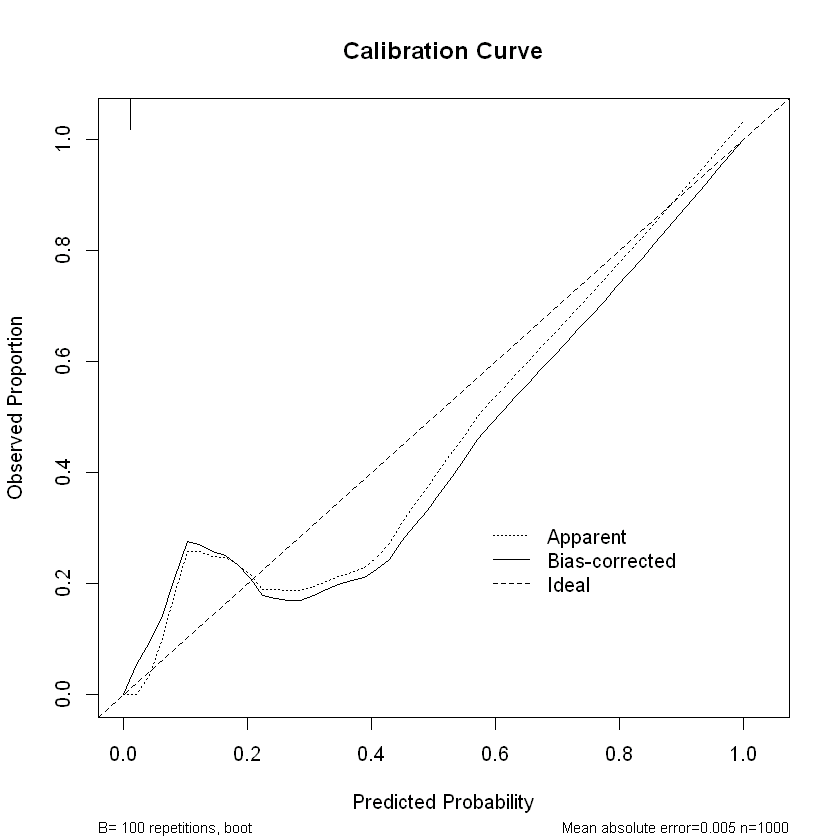

In [12]:
# 绘制校准曲线
plot(calibration_result, main = "Calibration Curve", xlab = "Predicted Probability", ylab = "Observed Proportion")

In [13]:
head(calibration_result)

predy,calibrated.orig,calibrated.corrected,index.orig,training,test,optimism,index.corrected,n
6.487265e-24,0.00000000,4.591916e-21,-6.487265e-24,1.720739e-24,4.593637e-21,-4.591916e-21,4.585429e-21,85
2.040545e-02,0.00000000,5.416610e-02,-2.040545e-02,6.712344e-03,6.087844e-02,-5.416610e-02,3.376064e-02,100
4.081091e-02,0.03531016,9.425798e-02,-5.500743e-03,2.004277e-02,7.899058e-02,-5.894781e-02,5.344707e-02,100
6.121636e-02,0.09656184,1.381372e-01,3.534549e-02,2.392126e-02,6.549665e-02,-4.157540e-02,7.692088e-02,100
8.162181e-02,0.18143783,2.101490e-01,9.981602e-02,3.105309e-02,5.976428e-02,-2.871119e-02,1.285272e-01,100
1.020273e-01,0.25748856,2.754657e-01,1.554613e-01,3.775476e-02,5.573194e-02,-1.797718e-02,1.734385e-01,100
